<a href="https://colab.research.google.com/github/brojas57/storealura/blob/main/AluraStoreLatam_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Facturación total por tienda:
     Tienda            Total
0  Tienda 1 1,150,880,400.00
1  Tienda 2 1,116,343,500.00
2  Tienda 3 1,098,019,600.00
3  Tienda 4 1,038,375,700.00 

La tienda que más factura es: Tienda 1



<ipython-input-1-ee30ad3b64c4>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Total', data=df, palette='viridis')


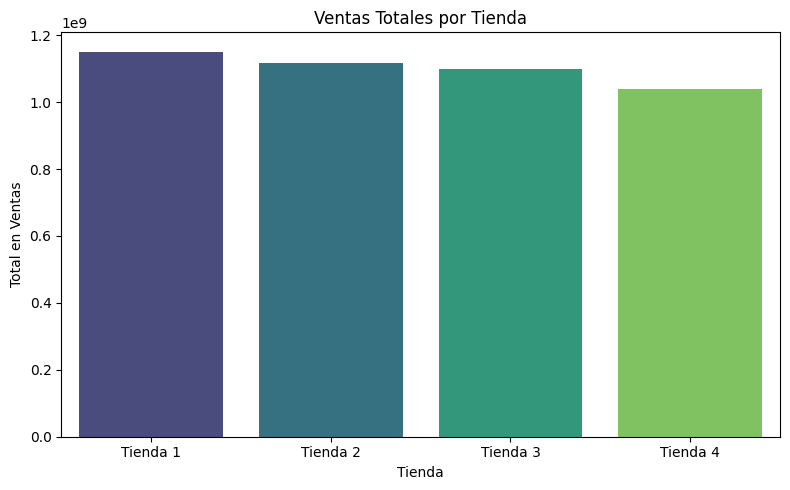

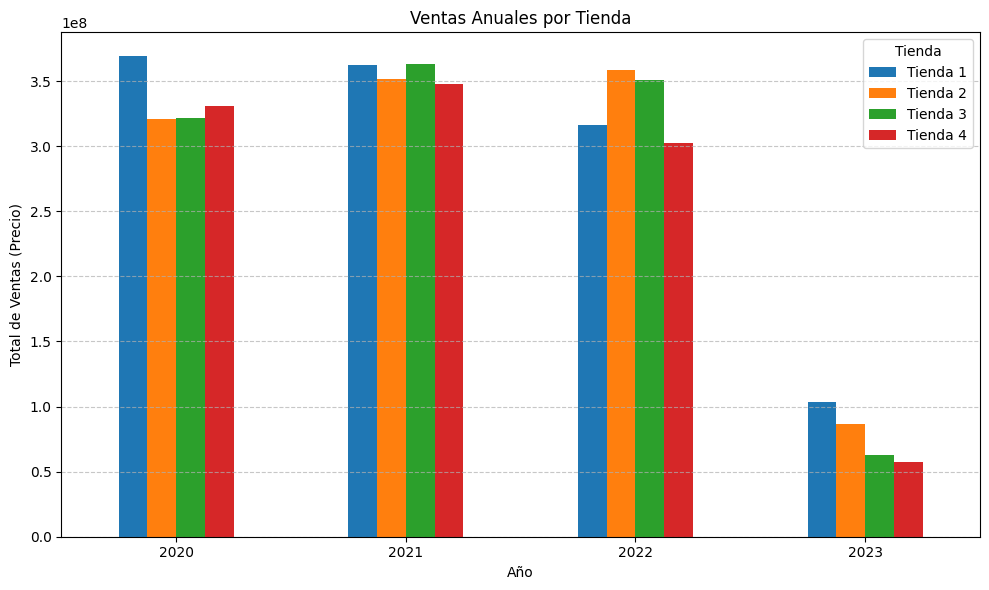

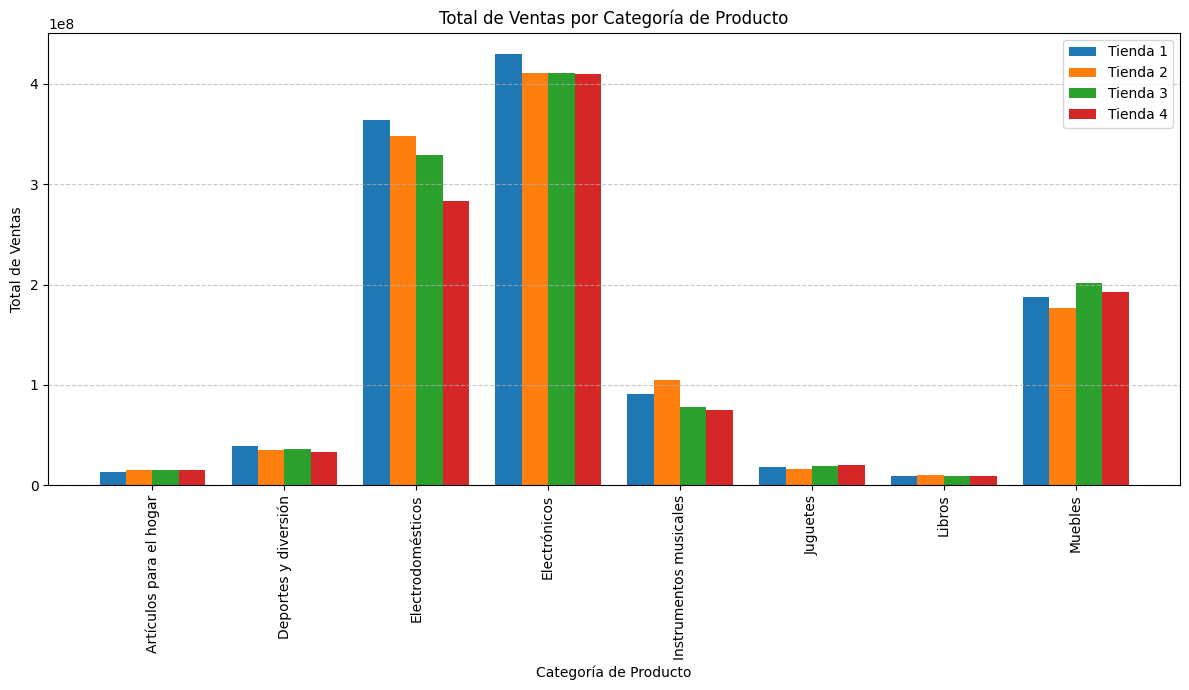

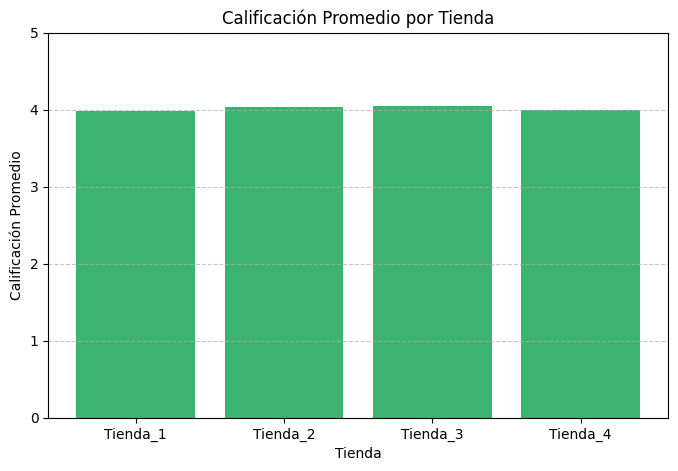

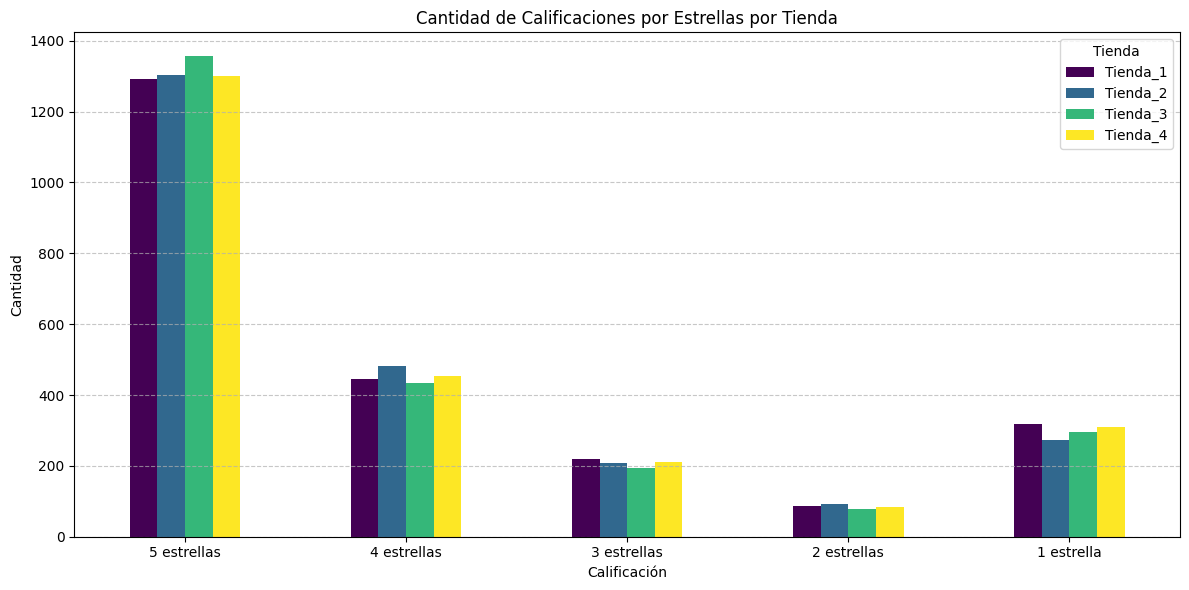

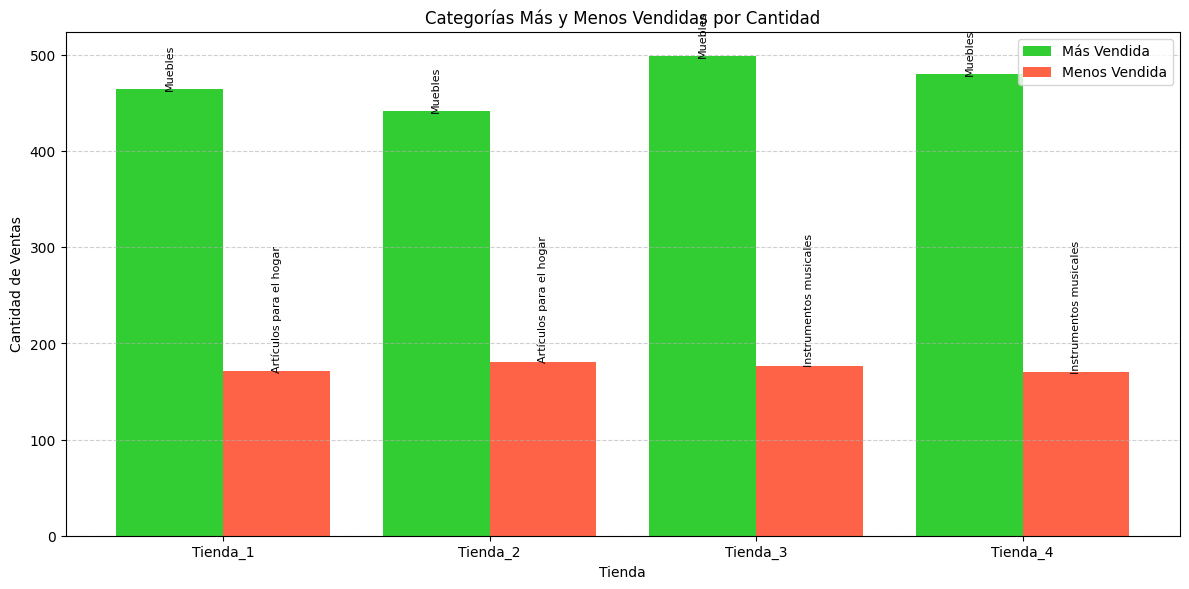

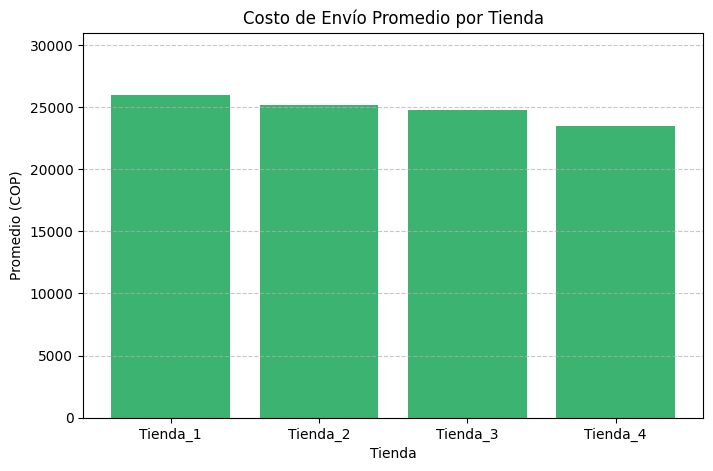


Ranking final de tiendas por puntaje total:
     Tienda  Puntaje Total
0  Tienda_2           0.73
1  Tienda_3           0.69
2  Tienda_1           0.40
3  Tienda_4           0.27


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar datasets
tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Diccionario de tiendas
tiendas = {
    'Tienda 1': tienda_1,
    'Tienda 2': tienda_2,
    'Tienda 3': tienda_3,
    'Tienda 4': tienda_4
}

# Mostrar valores
pd.options.display.float_format = '{:,.2f}'.format

# ------------------ FACTURACIÓN TOTAL ------------------
totales = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}
df_totales = pd.DataFrame(list(totales.items()), columns=['Tienda', 'Total'])

print("Facturación total por tienda:")
print(df_totales, "\n")

tienda_top = df_totales.loc[df_totales['Total'].idxmax(), 'Tienda']
print(f"La tienda que más factura es: {tienda_top}\n")

# Gráfico de facturación total
def graficar_ventas_totales(df):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Tienda', y='Total', data=df, palette='viridis')
    plt.title('Ventas Totales por Tienda')
    plt.ylabel('Total en Ventas')
    plt.xlabel('Tienda')
    plt.tight_layout()
    plt.show()

graficar_ventas_totales(df_totales)

# ------------------ VENTAS ANUALES ------------------
for df in (tienda_1, tienda_2, tienda_3, tienda_4):
    df["Fecha de Compra"] = pd.to_datetime(df["Fecha de Compra"], dayfirst=True)
    df["Año"] = df["Fecha de Compra"].dt.year

ventas_anuales = (
    pd.concat([
        tienda_1.assign(Tienda="Tienda 1"),
        tienda_2.assign(Tienda="Tienda 2"),
        tienda_3.assign(Tienda="Tienda 3"),
        tienda_4.assign(Tienda="Tienda 4")
    ])
    .groupby(["Año", "Tienda"])["Precio"]
    .sum()
    .reset_index()
)

pivot_anual = ventas_anuales.pivot(index='Año', columns='Tienda', values='Precio')
pivot_anual.plot(kind="bar", figsize=(10, 6), stacked=False)
plt.title("Ventas Anuales por Tienda")
plt.xlabel("Año")
plt.ylabel("Total de Ventas (Precio)")
plt.xticks(rotation=0)
plt.legend(title="Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# ------------------ VENTAS POR CATEGORÍA ------------------
def ventas_por_categoria(df, nombre_tienda):
    resultado = df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    resultado.columns = ['Categoría Producto', nombre_tienda]
    return resultado

cat_tienda_1 = ventas_por_categoria(tienda_1, 'Tienda_1')
cat_tienda_2 = ventas_por_categoria(tienda_2, 'Tienda_2')
cat_tienda_3 = ventas_por_categoria(tienda_3, 'Tienda_3')
cat_tienda_4 = ventas_por_categoria(tienda_4, 'Tienda_4')

df_categorias = cat_tienda_1.merge(cat_tienda_2, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_3, on='Categoría Producto', how='outer')
df_categorias = df_categorias.merge(cat_tienda_4, on='Categoría Producto', how='outer').fillna(0)

plt.figure(figsize=(12, 7))
categorias = df_categorias['Categoría Producto']
x = range(len(categorias))

plt.bar(x, df_categorias['Tienda_1'], width=0.2, label='Tienda 1')
plt.bar([i + 0.2 for i in x], df_categorias['Tienda_2'], width=0.2, label='Tienda 2')
plt.bar([i + 0.4 for i in x], df_categorias['Tienda_3'], width=0.2, label='Tienda 3')
plt.bar([i + 0.6 for i in x], df_categorias['Tienda_4'], width=0.2, label='Tienda 4')

plt.xticks([i + 0.3 for i in x], categorias, rotation=90)
plt.xlabel('Categoría de Producto')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Categoría de Producto')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ------------------ CALIFICACIÓN PROMEDIO ------------------
Calificaciones = {
    'Tienda_1': tienda_1['Calificación'].mean(),
    'Tienda_2': tienda_2['Calificación'].mean(),
    'Tienda_3': tienda_3['Calificación'].mean(),
    'Tienda_4': tienda_4['Calificación'].mean()
}
df_calificaciones = pd.DataFrame(list(Calificaciones.items()), columns=['Tienda', 'Calificación Promedio'])

plt.figure(figsize=(8, 5))
plt.bar(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], color='mediumseagreen')
plt.ylim(0, 5)
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

def contar_calificaciones(df, nombre_tienda):
    return {
        'Tienda': nombre_tienda,
        '5 estrellas': (df['Calificación'] == 5).sum(),
        '4 estrellas': (df['Calificación'] == 4).sum(),
        '3 estrellas': (df['Calificación'] == 3).sum(),
        '2 estrellas': (df['Calificación'] == 2).sum(),
        '1 estrella': (df['Calificación'] == 1).sum()
    }

calif_1 = contar_calificaciones(tienda_1, 'Tienda_1')
calif_2 = contar_calificaciones(tienda_2, 'Tienda_2')
calif_3 = contar_calificaciones(tienda_3, 'Tienda_3')
calif_4 = contar_calificaciones(tienda_4, 'Tienda_4')

df_calif_estrellas = pd.DataFrame([calif_1, calif_2, calif_3, calif_4])

df_calif_estrellas.set_index('Tienda').T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Cantidad de Calificaciones por Estrellas por Tienda')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ------------------ CATEGORÍAS MÁS Y MENOS VENDIDAS ------------------
def categorias_extremas(df, nombre_tienda):
    conteo = df['Categoría del Producto'].value_counts()
    return {
        'Tienda': nombre_tienda,
        'Categoría más vendida': conteo.idxmax(),
        'Cantidad más vendida': conteo.max(),
        'Categoría menos vendida': conteo.idxmin(),
        'Cantidad menos vendida': conteo.min()
    }

cat_1 = categorias_extremas(tienda_1, 'Tienda_1')
cat_2 = categorias_extremas(tienda_2, 'Tienda_2')
cat_3 = categorias_extremas(tienda_3, 'Tienda_3')
cat_4 = categorias_extremas(tienda_4, 'Tienda_4')

df_extremos = pd.DataFrame([cat_1, cat_2, cat_3, cat_4])

plt.figure(figsize=(12, 6))
x = range(len(df_extremos))
plt.bar(x, df_extremos['Cantidad más vendida'], width=0.4, label='Más Vendida', color='limegreen')
plt.bar([i + 0.4 for i in x], df_extremos['Cantidad menos vendida'], width=0.4, label='Menos Vendida', color='tomato')
plt.xticks([i + 0.2 for i in x], df_extremos['Tienda'])
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Ventas')
plt.title('Categorías Más y Menos Vendidas por Cantidad')

for i in x:
    plt.text(i, df_extremos['Cantidad más vendida'][i] + 1, df_extremos['Categoría más vendida'][i], ha='center', fontsize=8, rotation=90)
    plt.text(i + 0.4, df_extremos['Cantidad menos vendida'][i] + 1, df_extremos['Categoría menos vendida'][i], ha='center', fontsize=8, rotation=90)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------ COSTO DE ENVÍO PROMEDIO ------------------
envio_promedio = {
    'Tienda_1': tienda_1['Costo de envío'].mean(),
    'Tienda_2': tienda_2['Costo de envío'].mean(),
    'Tienda_3': tienda_3['Costo de envío'].mean(),
    'Tienda_4': tienda_4['Costo de envío'].mean()
}
df_envio_promedio = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Costo de Envío Promedio'])

plt.figure(figsize=(8, 5))
plt.bar(df_envio_promedio['Tienda'], df_envio_promedio['Costo de Envío Promedio'], color='mediumseagreen')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio (COP)')
plt.ylim(0, df_envio_promedio['Costo de Envío Promedio'].max() + 5000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ------------------ PUNTAJE FINAL ------------------
df_eval = df_totales.copy()
df_eval['Tienda'] = df_eval['Tienda'].str.replace(' ', '_')
df_calificaciones['Tienda'] = df_calificaciones['Tienda'].str.replace(' ', '_')
df_envio_promedio['Tienda'] = df_envio_promedio['Tienda'].str.replace(' ', '_')

df_eval = df_eval.merge(df_calificaciones, on='Tienda')
df_eval = df_eval.merge(df_calif_estrellas, on='Tienda')
df_eval = df_eval.merge(df_envio_promedio, on='Tienda')

df_eval['Total Calificaciones'] = df_eval[['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas']].sum(axis=1)
df_eval['% Malas'] = (df_eval['1 estrella'] + df_eval['2 estrellas']) / df_eval['Total Calificaciones'].replace(0, 1) * 100

df_puntaje = df_eval[['Tienda', 'Total', 'Calificación Promedio', '% Malas', 'Costo de Envío Promedio']].copy()

# Normalizar y calcular puntaje
scaler = MinMaxScaler()
df_norm = df_puntaje.copy()
df_norm[['Total', 'Calificación Promedio', '% Malas', 'Costo de Envío Promedio']] = df_norm[[
    'Total', 'Calificación Promedio', '% Malas', 'Costo de Envío Promedio'
]].fillna(df_norm.mean(numeric_only=True))

df_norm['Total'] = scaler.fit_transform(df_norm[['Total']])
df_norm['Calificación Promedio'] = scaler.fit_transform(df_norm[['Calificación Promedio']])
df_norm['% Malas'] = 1 - scaler.fit_transform(df_norm[['% Malas']])
df_norm['Costo de Envío Promedio'] = 1 - scaler.fit_transform(df_norm[['Costo de Envío Promedio']])

df_norm['Puntaje Total'] = (
    df_norm['Total'] * 0.40 +
    df_norm['Calificación Promedio'] * 0.30 +
    df_norm['% Malas'] * 0.15 +
    df_norm['Costo de Envío Promedio'] * 0.15
)

df_resultado = df_norm[['Tienda', 'Puntaje Total']].sort_values(by='Puntaje Total', ascending=False).reset_index(drop=True)

# Mostrar resultado final
print("\nRanking final de tiendas por puntaje total:")
print(df_resultado)

el sr juan debe vender a la tienda n°3 dado a que de las 4 tiendas que este tiene para elegir la n°3 es de la segunda que tiene mas ventas anuales, asi como tambien es la tercera con el promedio de costos de envios mas bajo, posee la categoria de muebles con mas ventas, es la de las mejores valoradas por sus clientes y asi como tambien siempre se mantiene como parte de las que mayores ventas tiene a pesar de poseer periodos de bajas ventas

---

